<a href="https://colab.research.google.com/github/hemanthumashankar0511/Scholarship-Analysis/blob/main/Scholarship_Analysis_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_palette("rocket")
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score,confusion_matrix,classification_report

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_excel("/content/drive/MyDrive/IS.xlsx")

# Exploratory Data Analysis

In [ ]:
df.describe()

,Outcome
count,245760.000000
mean,0.133333
std,0.339935
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 245760 entries, 0 to 245759
Data columns (total 12 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   Name                     245760 non-null  object
 1   Education Qualification  245760 non-null  object
 2   Gender                   245760 non-null  object
 3   Community                245760 non-null  object
 4   Religion                 245760 non-null  object
 5   Exservice-men            245760 non-null  object
 6   Disability               245760 non-null  object
 7   Sports                   245760 non-null  object
 8   Annual-Percentage        245760 non-null  object
 9   Income                   245760 non-null  object
 10  India                    245760 non-null  object
 11  Outcome                  245760 non-null  int64 
dtypes: int64(1), object(11)
memory usage: 22.5+ MB


In [ ]:
print("This is preliminary analysis for no of applicants not no of scholars")
for col in df.columns:
    print( df[col].value_counts() )
    print("-"*100)

This is preliminary analysis for no of applicants not no of scholars
Name
INSPIRE Scholarship 2022-23 ? Scholarship for Higher Education (SHE)                 24576
Abdul Kalam Technology Innovation National Fellowship                                24576
AAI Sports Scholarship Scheme in India 2022-23                                       24576
Glow and lovely Career Foundation Scholarship                                        24576
National Fellowship for Persons with Disabilities                                    24576
ONGC Sports Scholarship Scheme 2022-23                                               24576
Pragati Scholarship ? AICTE-Scholarship Scheme to Girl Child                         24576
Dr. Ambedkar post matric Scholarship                                                 24576
Indira Gandhi Scholarship for Single Girl Child UGC Scholarship for PG Programmes    24576
National Overseas Scholarship Scheme 2021-22                                         24576
Name: count, dty

## Key Takeaway Points
* Data is clean, we don't have any missing values.
* All the feature columns are categorical in nature.
* All the feature columns are equally distributed among categories.
* Ordinal Features: Education Qualification, Annual-Percentage, Income
* Nominal Features: Name, Gender, Community, Religion, Exservice-men, Disability, Sports, India

In [ ]:
def get_graph_data(df, feature_col):

    df_0 = df[ df["Outcome"]==0 ][[feature_col,"Outcome"]].groupby(feature_col).count()
    df_0 = df_0.reset_index()

    df_1 = df[ df["Outcome"]==1 ][[feature_col,"Outcome"]].groupby(feature_col).count()
    df_1 = df_1.reset_index()

    df = pd.DataFrame()
    df[feature_col] = df_0[feature_col]

    df["Outcome=0"] = df_0["Outcome"]
    df["Outcome=1"] = df_1["Outcome"]

    df["Outcome_Total"] = df["Outcome=0"] + df["Outcome=1"]
    df["Outcome=0 %"] = ( df["Outcome=0"] / df["Outcome_Total"] ) * 100
    df["Outcome=1 %"] = ( df["Outcome=1"] / df["Outcome_Total"] ) * 100

    return df

## Relationship between Scholarship Program Name & Scholarship
##### > Abdul Kalam Technology Innovation National Fellowship has provided more scholarships compared to others.

<ipython-input-9-16be6b86091c>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=df_name, x="Name_fmt", y="Outcome=1 %",palette="rocket")


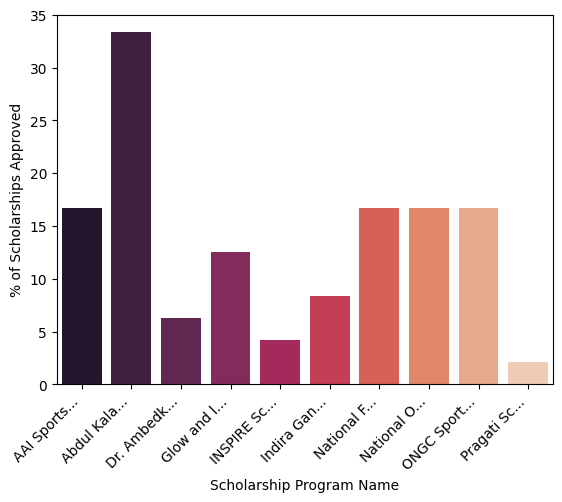

In [ ]:
df_name = get_graph_data(df, "Name")
df_name["Name_fmt"] = df_name["Name"].apply(lambda x: x[0:10] + "...")
ax = sns.barplot(data=df_name, x="Name_fmt", y="Outcome=1 %",palette="rocket")
plt.xticks(rotation = 45, ha = 'right')
plt.xlabel("Scholarship Program Name")
plt.ylabel("% of Scholarships Approved")
plt.show()

## Relationship between Education Qualification & Scholarship
##### > Postgradtuates have got more scholarships compared to undergraduates and doctrates.

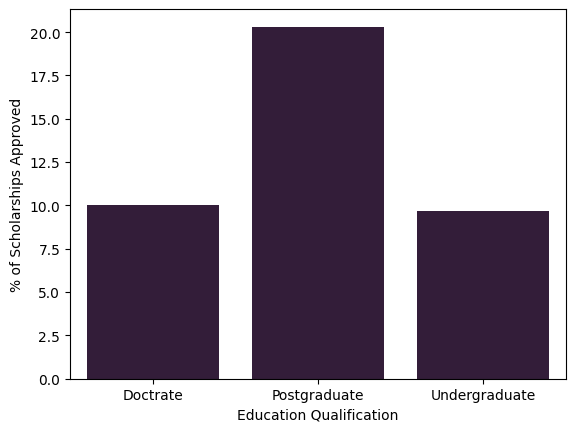

In [ ]:
df_education = get_graph_data(df, "Education Qualification")
ax = sns.barplot(data=df_education, x="Education Qualification", y="Outcome=1 %")
plt.xlabel("Education Qualification")
plt.ylabel("% of Scholarships Approved")
plt.show()

## Relationship between Gender & Scholarship
##### > Females have got more scholarships compared to males.

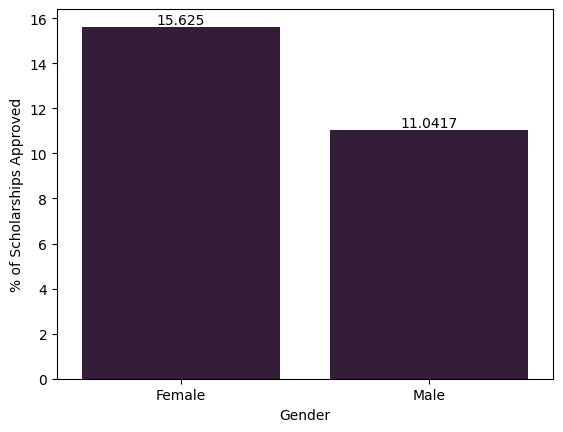

In [ ]:
df_gender = get_graph_data(df, "Gender")
ax = sns.barplot(data=df_gender, x="Gender", y="Outcome=1 %")
ax.bar_label(ax.containers[0])
plt.xlabel("Gender")
plt.ylabel("% of Scholarships Approved")
plt.show()

## Relationship between Community & Scholarship
##### > SC/ST and Minority have got more scholarships compared to others.

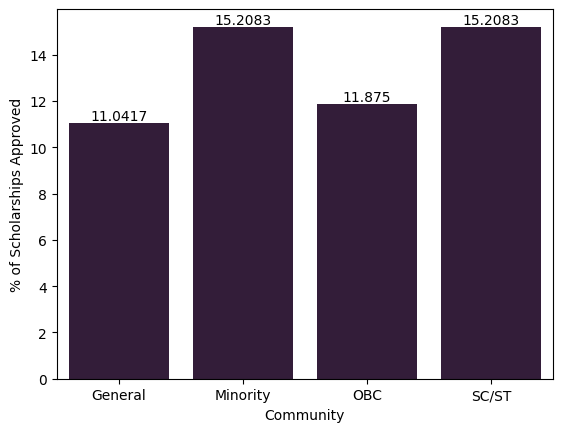

In [ ]:
df_community = get_graph_data(df, "Community")
df_community
ax = sns.barplot(data=df_community, x="Community", y="Outcome=1 %")
ax.bar_label(ax.containers[0])
plt.xlabel("Community")
plt.ylabel("% of Scholarships Approved")
plt.show()

## Relationship between Religion & Scholarship
##### > Scholarships have been equally distributed among all religion students.

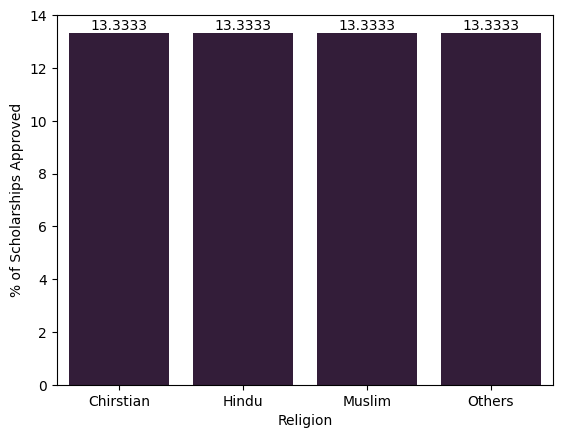

In [ ]:
df_community = get_graph_data(df, "Religion")
ax = sns.barplot(data=df_community, x="Religion", y="Outcome=1 %")
ax.bar_label(ax.containers[0])
plt.xlabel("Religion")
plt.ylabel("% of Scholarships Approved")
plt.show()

## Relationship between Exservice-man & Scholarship
##### > Scholarships given are equally distributed irrespective of exservice-man or not.

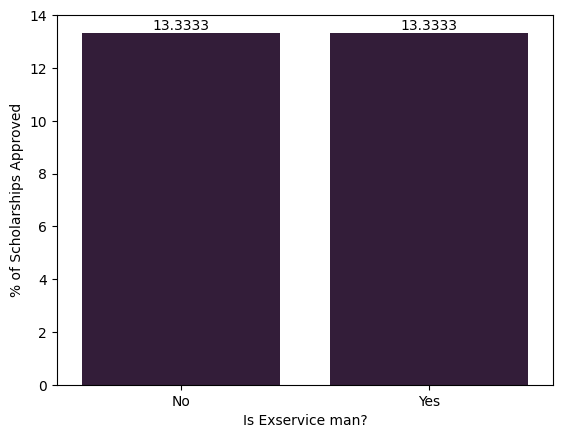

In [ ]:
df_community = get_graph_data(df, "Exservice-men")
ax = sns.barplot(data=df_community, x="Exservice-men", y="Outcome=1 %")
ax.bar_label(ax.containers[0])
plt.xlabel("Is Exservice man?")
plt.ylabel("% of Scholarships Approved")
plt.show()

## Relationship between Disability & Scholarship
##### > Disabled students got more scholarships compared to not-disabled.

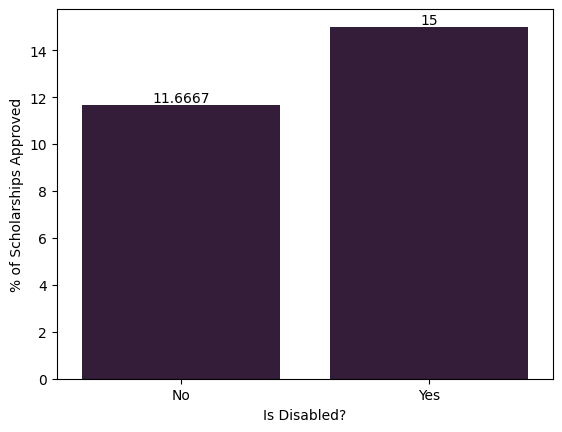

In [ ]:
df_community = get_graph_data(df, "Disability")
ax = sns.barplot(data=df_community, x="Disability", y="Outcome=1 %")
ax.bar_label(ax.containers[0])
plt.xlabel("Is Disabled?")
plt.ylabel("% of Scholarships Approved")
plt.show()

## Relationship between Sports & Scholarship
##### > Student's active in sports got more scholarship compared to others.

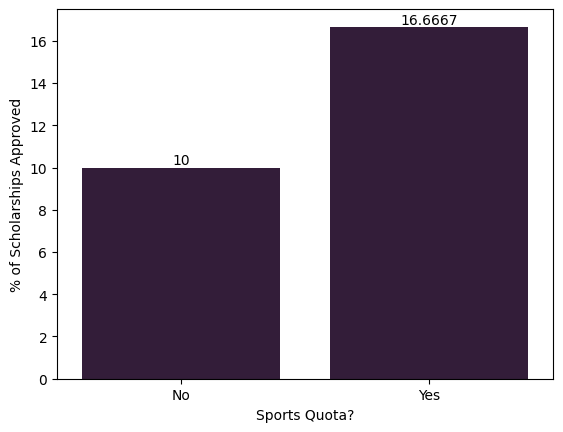

In [ ]:
df_community = get_graph_data(df, "Sports")
ax = sns.barplot(data=df_community, x="Sports", y="Outcome=1 %")
ax.bar_label(ax.containers[0])
plt.xlabel("Sports Quota?")
plt.ylabel("% of Scholarships Approved")
plt.show()

## Relationship between Annual Percentage & Scholarship
##### > Students having 90+ percentage got more scholarship compared to others.

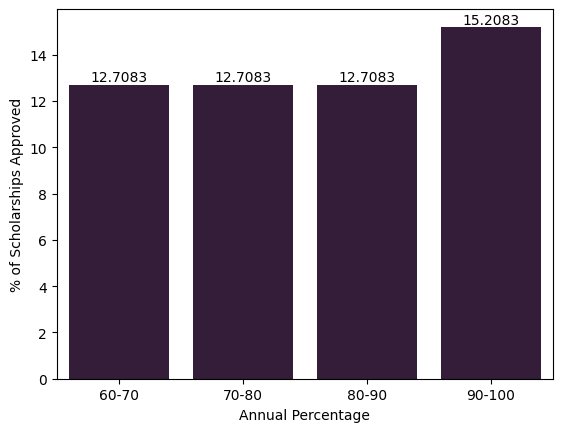

In [ ]:
df_community = get_graph_data(df, "Annual-Percentage")
df_community
ax = sns.barplot(data=df_community, x="Annual-Percentage", y="Outcome=1 %")
ax.bar_label(ax.containers[0])
plt.xlabel("Annual Percentage")
plt.ylabel("% of Scholarships Approved")
plt.show()

## Relationship between Income & Scholarship
##### > Those having income upto 1.5 lakhs got more scholarship compared to others.

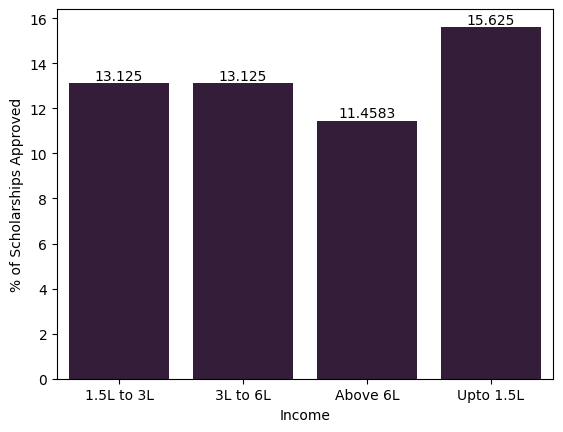

In [ ]:
df_community = get_graph_data(df, "Income")
ax = sns.barplot(data=df_community, x="Income", y="Outcome=1 %")
ax.bar_label(ax.containers[0])
plt.xlabel("Income")
plt.ylabel("% of Scholarships Approved")
plt.show()

## Relationship between Location & Scholarship
##### > Students with location in India got more scholarship compared to outside India.

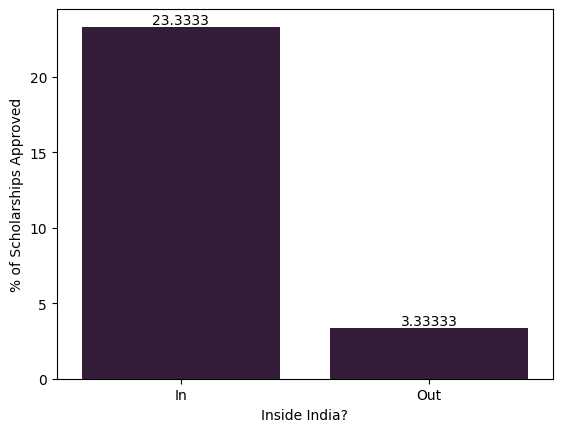

In [ ]:
df_community = get_graph_data(df, "India")
ax = sns.barplot(data=df_community, x="India", y="Outcome=1 %")
ax.bar_label(ax.containers[0])
plt.xlabel("Inside India?")
plt.ylabel("% of Scholarships Approved")
plt.show()

# Cleaning Data

* We will drop following attributes...
1. Name = as we will focus to find general trend of getting scholarship
2. Religion, Exservice-men = as data shows outcome is equaly distributed among categories


In [ ]:
df = df.drop(["Name", "Religion", "Exservice-men"], axis=1)

In [ ]:
y = df["Outcome"]
X = df.drop("Outcome", axis=1)
X=pd.get_dummies(X)

# Training the Models

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

In [ ]:
Rclf = RandomForestClassifier(max_depth=10, min_samples_split=100,random_state=42)
Rclf.fit(X_train, y_train)
Aclf= GaussianNB()
Aclf.fit(X_train,y_train)

GaussianNB()

In [ ]:
Ry_pred = Rclf.predict(X_test)
Ay_pred = Aclf.predict(X_test)

# Performance Metrics

### Confusion Matrix

In [ ]:
print('Random Forest Confusion matrix: ')
Rconf=confusion_matrix(y_test, Ry_pred)
Rconf = (Rconf / np.sum(Rconf)) * 100
print(Rconf)
print('Gaussian Naive Bayes Confusion matrix: ')
Aconf=confusion_matrix(y_test, Ay_pred)
Aconf = (Aconf / np.sum(Aconf)) * 100
print(Aconf)

Random Forest Confusion matrix: 
[[85.60872396  0.93424479]
 [12.03450521  1.42252604]]
Gaussian Naive Bayes Confusion matrix: 
[[73.54817708 12.99479167]
 [ 6.16861979  7.28841146]]


### Accuracy, Precision & F1-Score

In [ ]:

print("Random Forest metrics:")
Raccuracy = accuracy_score(y_test, Ry_pred)
print(f"Accuracy = {round(Raccuracy,2)}")
Rprecision = precision_score(y_test, Ry_pred)
print(f"Precision = {round(Rprecision,2)}")
Rrecall = recall_score(y_test, Ry_pred)
print(f"Recall = {round(Rrecall,2)}")
RF1_score = f1_score(y_test, Ry_pred)
print(f"F1-Score = {round(RF1_score,2)}")
print("--------\nGaussian Naive Bayes Metrics:")
accuracy = accuracy_score(y_test, Ay_pred)
print(f"Accuracy = {round(accuracy,2)}")
precision = precision_score(y_test, Ay_pred)
print(f"Precision = {round(precision,2)}")
recall = recall_score(y_test, Ay_pred)
print(f"Recall = {round(recall,2)}")
F1_score = f1_score(y_test, Ay_pred)
print(f"F1-Score = {round(F1_score,2)}")

Random Forest metrics:
Accuracy = 0.87
Precision = 0.6
Recall = 0.11
F1-Score = 0.18
--------
Gaussian Naive Bayes Metrics:
Accuracy = 0.81
Precision = 0.36
Recall = 0.54
F1-Score = 0.43


### Classification Report

In [ ]:
print("Random forest report: ",classification_report(y_test, Ry_pred))
print("Gaussian Naive bayes report: ",classification_report(y_test, Ay_pred))

              precision    recall  f1-score   support

           0       0.88      0.99      0.93     53172
           1       0.60      0.11      0.18      8268

    accuracy                           0.87     61440
   macro avg       0.74      0.55      0.55     61440
weighted avg       0.84      0.87      0.83     61440

              precision    recall  f1-score   support

           0       0.92      0.85      0.88     53172
           1       0.36      0.54      0.43      8268

    accuracy                           0.81     61440
   macro avg       0.64      0.70      0.66     61440
weighted avg       0.85      0.81      0.82     61440



In [ ]:
new_instance = pd.DataFrame({
    'Education Qualification': ['Postgraduate'],
    'Gender': ['Feale'],
    'Community': ['SC/ST'],
    'Disability': ['Yes'],
    'Sports': ['Yes'],
    'Annual-Percentage': ['90-100'],
    'Income': ['Upto 1.5L'],
    'India': ['In']
})
new_instance = pd.get_dummies(new_instance)
for col in X_train.columns:
   if col not in new_instance.columns:
        new_instance[col] = 0
new_instance = new_instance[X_train.columns]
rfc_prediction = Rclf.predict(new_instance)
print("Random Forest Classifier Prediction:", rfc_prediction)
gnb_prediction = Aclf.predict(new_instance)
print("Gaussian Naive Bayes Prediction:", gnb_prediction)

Random Forest Classifier Prediction: [1]
Gaussian Naive Bayes Prediction: [1]


# Conclusion

* We have got accuracy of 87% for Random Forest while it is 81% for Gaussian Naive Bayes ,thus in general its descent performance. It also shows that ensemble classification is better than singular estimator.
* Our precision, recall and f1-score are poor, since we have imbalance dataset for both categories - got scholarship & not got scholarship.
* Poor precision, recall and f1-score indicates our prediction of got scholarship is not great. But high acccuracy indicates we are able to predict well.
* Thus our model performance is great when our prediction is got no scholarship, and poor  when prediction is got scholarship.